In [129]:
lista1=[1,5,10,-34]
lista2=[23,13,5,7]

numero_valores=len(lista1)

nueva_lista=[]
for i in range(numero_valores):
    resta=lista2[i]-lista1[i]
    nueva_lista.append(resta)
    print("Resultado Resta:",resta,"   Nueva Lista:",nueva_lista)

Resultado Resta: 22    Nueva Lista: [22]
Resultado Resta: 8    Nueva Lista: [22, 8]
Resultado Resta: -5    Nueva Lista: [22, 8, -5]
Resultado Resta: 41    Nueva Lista: [22, 8, -5, 41]


# Arules

In [ ]:
from apyori import apriori

In [ ]:
#1.Ponga el working directory correcto y cargue la data utilizando la funcion read.table. ¿Por que no funciono?


#2.Cargue la data utilizando read.transactions y utilice las funciones summary, inspect, itemFrequency y itemFrequencyPlot

#3. Entrenar el modelo apriori con parámetros: support = 0.005, confidence = 0.2 y minlen = 2.


#4. Investigue las reglas creadas con las funciones summary e inspect. Además ordene las reglas por confidence y luego por lift.


#5. Prediga que producto se le deberia de ofrecer a un cliente si ya se sabe que va a comprar "root vegetables"? Investigue las reglas


In [ ]:
#1. Cargue la data hacia in dataframe de pandas
#2. Utilice la funcion read_csv

In [113]:
# Input
data_file = '/Users/christianbohl/Documents/Vida_Profesional/Martinexsa/R_Python Jorge/groceries.csv'

# Delimiter
data_file_delimiter = ','

# The max column count a line in the file could have
largest_column_count = 0

# Loop the data lines
with open(data_file, 'r') as temp_f:
    # Read the lines
    lines = temp_f.readlines()

    for l in lines:
        # Count the column count for the current line
        column_count = len(l.split(data_file_delimiter))

        # Set the new most column count
        largest_column_count = column_count if largest_column_count < column_count else largest_column_count

32

In [114]:
groceries=pd.read_csv('/Users/christianbohl/Documents/Vida_Profesional/Martinexsa/R_Python Jorge/groceries.csv',names=list(range(largest_column_count)))

print(len(groceries))
groceries.isna().sum()

9835


0        0
1     2159
2     3802
3     5101
4     6106
5     6961
6     7606
7     8151
8     8589
9     8939
10    9185
11    9367
12    9484
13    9562
14    9639
15    9694
16    9740
17    9769
18    9783
19    9797
20    9806
21    9817
22    9821
23    9827
24    9828
25    9828
26    9829
27    9830
28    9831
29    9834
30    9834
31    9834
dtype: int64

In [115]:
groceries.head(5)

0                    1               2   \
0      citrus fruit  semi-finished bread       margarine   
1    tropical fruit               yogurt          coffee   
2        whole milk                  NaN             NaN   
3         pip fruit               yogurt   cream cheese    
4  other vegetables           whole milk  condensed milk   

                         3    4    5    6    7    8    9   ...   22   23   24  \
0               ready soups  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
2                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3              meat spreads  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4  long life bakery product  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

    25   26   27   28   29   30   31  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 32 columns]

In [143]:
records=[]

for i in range(len(groceries)):
    
    records.append([str(f) for f in list(groceries.iloc[i]) if str(f) != 'nan'])
    
#    records.append([str(groceries.values[i,j]) for j in range(largest_column_count)])

In [147]:
association_rules = apriori(records, min_support=0.005, min_confidence=0.2, min_length=2)

association_results=list(association_rules)

In [148]:
len(association_results)

534

In [241]:
association_results[1][2][0]

OrderedStatistic(items_base=frozenset({'UHT-milk'}), items_add=frozenset({'bottled water'}), confidence=0.21884498480243159, lift=1.9800739885298202)

In [244]:
antecedent=[]
precedent=[]
confidence=[]
lift=[]

for x,rule in enumerate(association_results):
    antecedent.append('; '.join(list(rule[2][0].items_base)))
    precedent.append('; '.join(list(rule[2][0].items_add)))
    confidence.append(rule[2][0].confidence)
    lift.append(rule[2][0].lift)

results=pd.concat([
    pd.Series(antecedent),
    pd.Series(precedent),
    pd.Series(confidence),
    pd.Series(lift)
],axis=1)

results.columns=["Antecedente","Precedente","Confidence","Lift"]

results.sort_values(["Confidence","Lift"],ascending=[False,False])

results[results["Antecedente"].str.contains("root")]

Antecedente                    Precedente  \
207                         root vegetables                    rolls/buns   
222                         root vegetables                    whole milk   
223                         root vegetables                        yogurt   
263                   root vegetables; beef                    whole milk   
286          bottled water; root vegetables                    whole milk   
296            brown bread; root vegetables                    whole milk   
309                 butter; root vegetables                    whole milk   
316                chicken; root vegetables                    whole milk   
331           citrus fruit; root vegetables                tropical fruit   
332           citrus fruit; root vegetables                    whole milk   
347                   root vegetables; curd                    whole milk   
361          domestic eggs; root vegetables                    whole milk   
369            root vegetables; frankfurter                    whole milk   
376      frozen vegetables; root vegetables                    whole milk   
383  fruit/vegetable juice; root vegetables                    whole milk   
406             root vegetables; newspapers                    whole milk   
438       other vegetables; root vegetables                tropical fruit   
440                         root vegetables  other vegetables; whole milk   
441       other vegetables; root vegetables                        yogurt   
465                 pastry; root vegetables                    whole milk   
471              pip fruit; root vegetables                tropical fruit   
472              pip fruit; root vegetables                    whole milk   
473              pip fruit; root vegetables                        yogurt   
480                   pork; root vegetables                    whole milk   
481             rolls/buns; root vegetables                tropical fruit   
482             rolls/buns; root vegetables                    whole milk   
483             rolls/buns; root vegetables                        yogurt   
497                root vegetables; sausage                    whole milk   
498                root vegetables; sausage                        yogurt   
499          shopping bags; root vegetables                    whole milk   
500                   soda; root vegetables                    whole milk   
501         root vegetables; tropical fruit                    whole milk   
502         root vegetables; tropical fruit                        yogurt   
503     root vegetables; whipped/sour cream                    whole milk   
504     root vegetables; whipped/sour cream                        yogurt   
505             root vegetables; whole milk                        yogurt   
526             rolls/buns; root vegetables  other vegetables; whole milk   
528         root vegetables; tropical fruit  other vegetables; whole milk   
529     root vegetables; whipped/sour cream  other vegetables; whole milk   
530                 root vegetables; yogurt  other vegetables; whole milk   
533         root vegetables; tropical fruit            yogurt; whole milk   

     Confidence      Lift  
207    0.222948  1.212101  
222    0.448694  1.756031  
223    0.236940  1.698475  
263    0.461988  1.808060  
286    0.467532  1.829758  
296    0.560000  2.191643  
309    0.637795  2.496107  
316    0.551402  2.157993  
331    0.321839  3.067139  
332    0.517241  2.024301  
347    0.570093  2.231146  
361    0.595745  2.331536  
369    0.500000  1.956825  
376    0.535088  2.094146  
383    0.542373  2.122657  
406    0.504425  1.974142  
438    0.259657  2.474538  
440    0.212687  2.842082  
441    0.272532  1.953611  
465    0.518519  2.029299  
471    0.339869  3.238967  
472    0.575163  2.250988  
473    0.339869  2.436308  
480    0.500000  1.956825  
481    0.242678  2.312729  
482    0.523013  2.046888  
483    0.297071  2.129515  
497    0.5170

# RANDOM FOREST EJ

In [ ]:
#1. Cargue el módulo de Random Forest de sklearn y cargue el dataset credit.csv como un dataframe de pandas.


#? ONE HOT la y?

#2. Divida la data en training y test con el 80% de la data en training y ponerle random_state

#3. Entrene un random forest. Para entrenar el modelo utilice los parametros ntree = 500, mtry = 5, nodesize = 50 e importance = TRUE
#Luego utilice la funcion plot para entender como se reduce el error cuando se va aumentano la cantidad de arboles


#4. Obtenga los votos de los arboles, grafique la importanca de las variables y obtenga la matriz de confusion para el train set

#5. Prediga el test set y obtenga la matriz de confusion ¿Por que le va mal para predecir cuando default es = a yes?



#6. Balancee el dataset y realice los pasos en los incisos anteriores

In [292]:
#1. 
from sklearn.ensemble import RandomForestClassifier
credit=pd.read_csv('/Users/christianbohl/Documents/Vida_Profesional/Martinexsa/R_Python Jorge/credit.csv')


#2.
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

credit["y"]=np.where(credit["default"]=="no",0,1)

x_col=["months_loan_duration","amount","percent_of_income","years_at_residence","age","existing_loans_count","dependents"]

X_credit=credit[x_col]
y_credit=credit["y"]

x_train,x_test,y_train,y_test = train_test_split(X_credit,y_credit,test_size=0.2,random_state=14)

#3
rf_model=RandomForestClassifier(n_estimators=500,max_depth=5,min_samples_split=50,random_state=14)

rf_model.fit(x_train,y_train)
rf_model.score(x_train,y_train)

0.7475

In [293]:
ntree=[]
r2=[]

for i in range(1,50):
    prueba=RandomForestClassifier(n_estimators=i,max_depth=5,min_samples_split=50,random_state=14)
    prueba.fit(x_train,y_train)
    
    ntree.append(i)
    r2.append(prueba.score(x_train,y_train))
    
sns.scatterplot(x=ntree,y=r2)

In [272]:
for x,tree in enumerate(rf_model.estimators_):
    print(x,":  ",tree.predict(np.array(x_train.iloc[1]).reshape(1,-1)))

0 :   [0.]
1 :   [0.]
2 :   [0.]
3 :   [0.]
4 :   [0.]
5 :   [0.]
6 :   [0.]
7 :   [0.]
8 :   [0.]
9 :   [0.]
10 :   [0.]
11 :   [0.]
12 :   [0.]
13 :   [0.]
14 :   [0.]
15 :   [0.]
16 :   [0.]
17 :   [0.]
18 :   [0.]
19 :   [0.]
20 :   [0.]
21 :   [0.]
22 :   [0.]
23 :   [0.]
24 :   [0.]
25 :   [0.]
26 :   [0.]
27 :   [0.]
28 :   [0.]
29 :   [0.]
30 :   [0.]
31 :   [0.]
32 :   [0.]
33 :   [0.]
34 :   [0.]
35 :   [0.]
36 :   [0.]
37 :   [0.]
38 :   [0.]
39 :   [0.]
40 :   [0.]
41 :   [0.]
42 :   [0.]
43 :   [0.]
44 :   [0.]
45 :   [0.]
46 :   [0.]
47 :   [0.]
48 :   [0.]
49 :   [0.]
50 :   [0.]
51 :   [0.]
52 :   [0.]
53 :   [0.]
54 :   [1.]
55 :   [0.]
56 :   [0.]
57 :   [0.]
58 :   [0.]
59 :   [0.]
60 :   [0.]
61 :   [0.]
62 :   [0.]
63 :   [0.]
64 :   [0.]
65 :   [0.]
66 :   [0.]
67 :   [0.]
68 :   [0.]
69 :   [0.]
70 :   [0.]
71 :   [0.]
72 :   [0.]
73 :   [0.]
74 :   [0.]
75 :   [0.]
76 :   [0.]
77 :   [0.]
78 :   [0.]
79 :   [0.]
80 :   [0.]
81 :   [0.]
82 :   [0.]
83 :   [0.]
84

In [294]:
for x,i in enumerate(rf_model.feature_importances_):
    print(x_col[x],":   ",i)

months_loan_duration :    0.2544128555104971
amount :    0.24894366096529405
percent_of_income :    0.043206680021006846
years_at_residence :    0.0192020763994541
age :    0.16931255167750744
existing_loans_count :    0.022572370375276138
dependents :    0.01631832641444553
phone :    0.024537480074392177
good :    0.027659830127218434
perfect :    0.06762815377288663
poor :    0.011794192942810353
very_good :    0.0944118217192112


In [295]:
cm=confusion_matrix(y_true=y_train,y_pred=round(pd.Series(rf_model.predict(x_train)),0))

cm

array([[555,  10],
       [192,  43]])

In [299]:
# BALANCED

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

credit["y"]=np.where(credit["default"]=="no",0,1)

x_col=["months_loan_duration","amount","percent_of_income","years_at_residence","age","existing_loans_count","dependents"]

num_y=credit["default"].value_counts()

min_num=min(num_y)

min_class=num_y[num_y==min(num_y)].index[0]

undersamp=credit[credit["default"]!=min_class].sample(min_num,random_state=14)

credit_balanced=pd.concat([undersamp,credit[credit["default"]==min_class]],axis=0)

X_credit=credit_balanced[x_col]
y_credit=credit_balanced["y"]

x_train,x_test,y_train,y_test = train_test_split(X_credit,y_credit,test_size=0.2,random_state=14)

#3
rf_model=RandomForestClassifier(n_estimators=500,max_depth=5,min_samples_split=50,random_state=14)

rf_model.fit(x_train,y_train)
rf_model.score(x_train,y_train)

0.7145833333333333

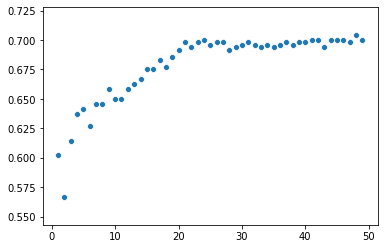

In [297]:
ntree=[]
r2=[]

for i in range(1,50):
    prueba=RandomForestClassifier(n_estimators=i,max_depth=5,min_samples_split=50,random_state=14)
    prueba.fit(x_train,y_train)
    
    ntree.append(i)
    r2.append(prueba.score(x_train,y_train))
    
sns.scatterplot(x=ntree,y=r2)

In [278]:
for x,tree in enumerate(rf_model.estimators_):
    print(x,":  ",tree.predict(np.array(x_train.iloc[1]).reshape(1,-1)))

0 :   [1.]
1 :   [1.]
2 :   [0.]
3 :   [1.]
4 :   [0.]
5 :   [1.]
6 :   [1.]
7 :   [1.]
8 :   [1.]
9 :   [0.]
10 :   [1.]
11 :   [1.]
12 :   [1.]
13 :   [0.]
14 :   [1.]
15 :   [1.]
16 :   [1.]
17 :   [1.]
18 :   [0.]
19 :   [1.]
20 :   [1.]
21 :   [1.]
22 :   [1.]
23 :   [1.]
24 :   [1.]
25 :   [0.]
26 :   [1.]
27 :   [1.]
28 :   [1.]
29 :   [1.]
30 :   [1.]
31 :   [1.]
32 :   [1.]
33 :   [1.]
34 :   [1.]
35 :   [1.]
36 :   [1.]
37 :   [1.]
38 :   [0.]
39 :   [1.]
40 :   [1.]
41 :   [0.]
42 :   [1.]
43 :   [1.]
44 :   [1.]
45 :   [1.]
46 :   [1.]
47 :   [0.]
48 :   [1.]
49 :   [1.]
50 :   [1.]
51 :   [1.]
52 :   [1.]
53 :   [1.]
54 :   [0.]
55 :   [1.]
56 :   [0.]
57 :   [1.]
58 :   [1.]
59 :   [0.]
60 :   [1.]
61 :   [1.]
62 :   [1.]
63 :   [1.]
64 :   [0.]
65 :   [1.]
66 :   [1.]
67 :   [1.]
68 :   [1.]
69 :   [1.]
70 :   [1.]
71 :   [0.]
72 :   [1.]
73 :   [1.]
74 :   [1.]
75 :   [0.]
76 :   [1.]
77 :   [1.]
78 :   [1.]
79 :   [1.]
80 :   [1.]
81 :   [1.]
82 :   [1.]
83 :   [1.]
84

In [279]:
for x,i in enumerate(rf_model.feature_importances_):
    print(x_col[x],":   ",i)

months_loan_duration :    0.2858639456511484
amount :    0.2974804343943318
percent_of_income :    0.06526236612340683
years_at_residence :    0.047487393753894595
age :    0.23731188055565403
existing_loans_count :    0.03248929572455029
dependents :    0.03410468379701411


In [298]:
cm=confusion_matrix(y_true=y_train,y_pred=round(pd.Series(rf_model.predict(x_train)),0))

cm

array([[157,  78],
       [ 65, 180]])

# REGRESION LINEAL MULTIPLE EJ

In [ ]:
# Multiple Linear Regression

# Importe el dataset "50_Startups.csv" como un dataframe de pandas

# Utilice "factor" para convertir la columna "State" a valores 1,2,3 como categorias

# Separar Test y Training Set con un split ratio de 0.8

# Obtenga la matriz de correlacion de las variables numericas utilizando el método .corr()

# Aplique regresion lineal al training set 

# Determine cuales son las variables significativas y que signinifica esto.
# Ademas, responda las siguientes preguntas: 
# 1. ??Cuantos coeficientes teoricamente deberia de tener el modelo? 
# 2. ??Cuantos realmente le aparecen? 
# 3. ??Por que le hace falta un coeficiente al modelo? 
# 4. ??Que categoria se encuentra en la situacion inicial (intercepto)?
# 5. Explique con sus palabras lo que significa el numero del coeficiente del intercepto
# 6. Explique con sus palabras lo que significa el numero de los demas coeficientes?
# 7. ??Cual es el R2 de su modelo?

# Correr el modelo otra vez sin las variables no significativas. ??Cual es su nuevo
# R2 y coeficientes? ??Vario mucho su R2?

# Grafique con ggplot su ultimo modelo en dos dimensiones

# Prediga los resultados del Test Set con su ultimo modelo. Grafique los resultados
# de la prediccion del Test Set contra el Profit real.


# Calcule el R2 y coeficiente de correlacion de las predicciones
# Que tan certero es el modelo? Por qu??



In [49]:
startup=pd.read_csv('/Users/christianbohl/Documents/Vida_Profesional/Martinexsa/R_Python Jorge/50_Startups.csv')

In [50]:
startup[["CA","FL","NY"]]=pd.get_dummies(startup["State"])

startup.drop(columns=["State","CA"],inplace=True)

In [51]:
from sklearn.model_selection import train_test_split

X_startup=startup[["R&D Spend","Administration","Marketing Spend","FL","NY"]]
y_startup=startup["Profit"]

x_train,x_test,y_train,y_test=train_test_split(X_startup,y_startup,train_size=0.8,random_state=14)

import matplotlib.pyplot as plt

startup.corr()

R&D Spend  Administration  Marketing Spend    Profit  \
R&D Spend         1.000000        0.241955         0.724248  0.972900   
Administration    0.241955        1.000000        -0.032154  0.200717   
Marketing Spend   0.724248       -0.032154         1.000000  0.747766   
Profit            0.972900        0.200717         0.747766  1.000000   
FL                0.105711        0.010493         0.205685  0.116244   
NY                0.039068        0.005145        -0.033670  0.031368   

                       FL        NY  
R&D Spend        0.105711  0.039068  
Administration   0.010493  0.005145  
Marketing Spend  0.205685 -0.033670  
Profit           0.116244  0.031368  
FL               1.000000 -0.492366  
NY              -0.492366  1.000000

In [52]:
import statsmodels.api as sm

lr_model = sm.OLS(y_train,x_train)

fitted = lr_model.fit()

fitted.summary2()

# 5 coef
# 6 coef
# 98.5%

#NO SIG

from sklearn.model_selection import train_test_split

X_startup=startup[["R&D Spend","Administration","Marketing Spend"]]
y_startup=startup["Profit"]

x_train,x_test,y_train,y_test=train_test_split(X_startup,y_startup,train_size=0.8,random_state=14)


lr_model = sm.OLS(y_train,x_train)

fitted = lr_model.fit()

fitted.summary2()

# PRACTICAMENTE IGUAL

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.987     
Dependent Variable:     Profit           AIC:                         876.3323  
Date:                   2020-09-29 12:15 BIC:                         881.3990  
No. Observations:       40               Log-Likelihood:              -435.17   
Df Model:               3                F-statistic:                 994.5     
Df Residuals:           37               Prob (F-statistic):          2.10e-35  
R-squared (uncentered): 0.988            Scale:                       1.7820e+08
------------------------------------------------------------------------------------
                     Coef.      Std.Err.       t        P>|t|      [0.025     0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7091       0.0780     9.0964     0.0000     0.5511     0.8670
Administration       0.3335       0.0351     9.5102     0.0000     0.2625     0.4046
Marketing Spend      0.0846       0.0270     3.1382     0.0033     0.0300     0.1392
--------------------------------------------------------------------------------
Omnibus:                    0.360             Durbin-Watson:               2.360
Prob(Omnibus):              0.835             Jarque-Bera (JB):            0.524
Skew:                       -0.038            Prob(JB):                    0.770
Kurtosis:                   2.445             Condition No.:               11   
================================================================================

"""

In [53]:
import seaborn as sns

comp=pd.concat([fitted.predict(x_train),y_train],axis=1)

comp.columns=["pred","true"]

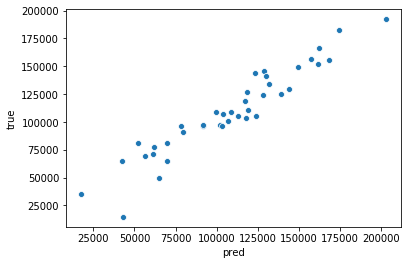

In [54]:
sns.scatterplot(comp["pred"],comp["true"])

In [56]:
import seaborn as sns

comp=pd.concat([fitted.predict(x_test),y_test],axis=1)

comp.columns=["pred","true"]

In [65]:
from sklearn.metrics import r2_score

print("R2: ",r2_score(y_pred=comp["pred"],y_true=comp["true"]),
      "Corr: ", np.corrcoef(comp["pred"],comp["true"])[0][1]
     )
sns.scatterplot(comp["pred"],comp["true"])

R2:  0.889055560456564 Corr:  0.9529725205171498


# INTRO A R

In [ ]:
# 1)
#   a) Cree una lista con los siguientes elementos: 56,96,67,12,45,58,23 y nombrelo costo_total

#   b) Eliga el cuarto elemento (indice 0) y cámbiele el valor a 35

#   c) Nombre los elementos en el vector en este orden "bananos" "carne" "limones" "lechugas" "sodas" "aguacates" "sal"

#   d) Cree otro vector, llámelo cantidades y póngale los siguientes elementos 20,4,30,10,3,5,1

#   e) Encuentre el precio por cada elemento dividiento el vector de costo_total entre el vector de cantidades y nombre
#      y al nuevo vector como precio_unitario

#   d) Por último, encuentre el promedio de los precios unitarios


# 2)
#   a) Con las variables del ejercico anterior, genere un df con los vectores creados (costo_total,cantidades,precio_unitario) 
#      y nombre a la matriz datos_compras

#   b) Elimine la columna de cantidades de la matriz

#   c) Saque la sumatoria de las columnas costo_total y precio_unitario


# 3)
#   a) Cargue el dataset german.txt y nombre el data frame como creditos. El parámetro stringsAsFactors deberá 
#     tener el valor FALSE. Tome en consideración,  para cargar el doc correctamente, si el documento tiene header 
#     y como están separadas las columnas en el texto plano.

#   b) Renombre las columnas de su data frame con los siguientes nombres:
# "check_acc", "duration","cred_history","purpose","cred_amount","savings","employment_time","rate","status_and_sex","debtors",
# "residence_time", "property","age","other_installments","housing","exist_credits","job","liable_people","telephone","foreginer","class"

#   c) Cambie las columnas check_acc,"cred_history" y "purpose" de tipo de dato a factor

#   d) Utilice las tres funciones básicas vistas en clase para obtener información general de un data frame

#   e) Utilizando el inciso anterior responda: ¿Cuantas columnas son de tipo factor? ¿Cuantas son de tipo entero?

#   f) Seleccione el elemento en la fila 20 columna 3

#   g) Obtenga el promedio de duración de los créditos en su data frame. Utilice la columna duration para hacerlo

#   h) Seleccione las primeras tres filas y las columnas 4 y 10 de su data frame

#   i) La columna rate indica la tasa anual a cobrar por los intereses. Sin embargo, está multiplicada por 100, por lo
#      que deberá dividirla dentro de 100 para obtenerlo de manera porcentual. A esta nueva columna llamela rate_per

#   j) Para obtener la ganancia por intereses en un año, debe multiplicar la columna rate_per por el monto del crédito.
#      El monto del crédito se encuentra guardado en la columna cred_amount. Guarde esta nueva columna como earn_year

#   k) Filtre su data frame para dejar solo los créditos en donde se va a obtener más de 90 de ganancia y nombre a este
#      nuevo data frame como creditos_filt

##  l) Por último, obtenga la suma de la columna earn_year de el data frame creditos_filt



In [58]:
#1.
costo_total= [56,96,67,12,45,58,23]

costo_total[3]=35

productos=["bananos", "carne" ,"limones", "lechugas", "sodas", "aguacates", "sal"]

cantidades=[20,4,30,10,3,5,1]

precio=[]

for i in range(len(costo_total)):
    precio.append(costo_total[i]/cantidades[i])
    
np.mean(precio)

#2.
datos_compras=pd.concat([pd.Series(productos),pd.Series(precio),pd.Series(cantidades),pd.Series(costo_total)],axis=1)

datos_compras.columns=["productos","precio","cantidades","costo_total"]

datos_compras.drop(columns=["cantidades"],inplace=True)

print(datos_compras["costo_total"].sum(),datos_compras["precio"].sum())

#3.
german=pd.read_csv('/Users/christianbohl/Documents/Vida_Profesional/Martinexsa/R_Python Jorge/german.txt',sep=" ",header=None)

german.columns=["check_acc", "duration","cred_history","purpose","cred_amount","savings","employment_time","rate","status_and_sex","debtors","residence_time", "property","age","other_installments","housing","exist_credits","job","liable_people","telephone","foreginer","class"]

380 82.13333333333333


In [ ]:
german.dtypes
german.describe()
german.head(5)
german.tail(5)

In [99]:
german.iloc[20,3]
german["duration"].mean()

german.iloc[0:3,[3,9]]

german["rate_per"]=german["rate"]/100

german["earn_year"]=german["rate_per"]*german["cred_amount"]

creditos_filt=german[german["earn_year"]>=90]

creditos_filt["earn_year"].sum()

57188.1

In [44]:
# Cree una lista con los siguientes 10 valores numericos 3,10,19,10,25,43,12,15,78,54 nombrela lista

lista=[3,10,19,10,25,43,12,15,78,54]

# Calcule la media
# con la media de numpy. Luego calcule la desviación estandar con numpy

print(
    np.mean(lista),
    np.std(lista)
     )


# Ahora calcule la mediana con la libreria statistics. Tambien calcule la moda

!pip install statistics
import statistics as st

print(
    st.median(lista),
    st.mode(lista)
)

# Convierta la lista en un dataframe y calcule los percentiles de los datos

lista.sort()

df_lista=pd.DataFrame(lista)
df_lista["ix"]=range(len(lista))
df_lista["ix"]+=1
df_lista["percentil"]=df_lista["ix"]/df_lista["ix"].max()
df_lista

26.9 22.752802025245153
17.0 10


0  ix  percentil
0   3   1        0.1
1  10   2        0.2
2  10   3        0.3
3  12   4        0.4
4  15   5        0.5
5  19   6        0.6
6  25   7        0.7
7  43   8        0.8
8  54   9        0.9
9  78  10        1.0

In [45]:
#Genere un dataframe con 500 datos random que sigan una distribución normal. Utilice la libreria random para hacerlo
# uilice media de 0 y desviacion de 50
#Utilice seabon para hacer un histograma de los datos
#!pip install random2
#!pip install seaborn
import random as rn
import seaborn as sns

gaus=pd.DataFrame()

lista_gaus=[rn.gauss(0,50) for f in range(500)]

gaus["Datos"]=lista_gaus

## Calcule el valor z para cada dato generado aleartoreamente con la funcion z=xi-xprom/desv
# es de poblacion

gaus["z"]=(gaus["Datos"]-gaus["Datos"].mean())/gaus["Datos"].std()

gaus

Datos         z
0   -23.025361 -0.458266
1    -9.785830 -0.181926
2    25.302012  0.550437
3   -66.065706 -1.356616
4   -34.774210 -0.703491
..         ...       ...
495 -11.715834 -0.222210
496 -59.071498 -1.210631
497   6.943397  0.167251
498   4.794735  0.122403
499 -31.290043 -0.630768

[500 rows x 2 columns]

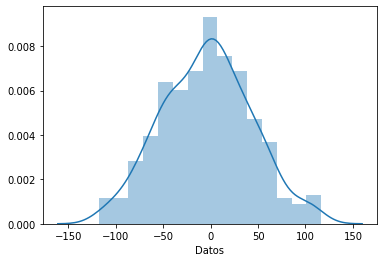

In [39]:
sns.distplot(gaus["Datos"])

In [52]:
df_ejemplo=pd.DataFrame()

lista_unidades=[int(rn.gauss(100,10)) for f in range(500)]

df_ejemplo["Unidades"]=lista_unidades

df_ejemplo["Producto"]="Gaseosa"

df_ejemplo["Precio"]=11

df_ejemplo.head(5)

Unidades Producto  Precio
0       116  Gaseosa      11
1        97  Gaseosa      11
2        94  Gaseosa      11
3       116  Gaseosa      11
4       103  Gaseosa      11

# K MEANS EJ

In [ ]:
### Ejercicio 1 
### Cargue el archivo txt separado por tabs llamado "Data kmeans.txt" en excel. Con dicha data utilice el 
### algoritmo de Kmeans para clusterizar la data. Tome en cuenta que debe utilizar 2 iteraciones, 3 clusters (o Ks),
### debe normalizar la data y los centroides deben comenzar en las siguientes posiciones normalizadas 
### K1=(0.3,0.4) K2=(0.7,0.6) y K3 =(0.5,0.5). Luego de realizar las 2 iteraciones grafique su ultima iteracion 
### conteste la siguiente pregunta: Que dos cosas puedo hacer para mejorar mi clustering?

### Ejercicio 2
### Cargue el archivo llamado "Data kmeans 2.txt", nombrelo como "data".
### Grafique la tabla resultante en dos ejes (variable x en eje x y variable y en eje y
### Responda las siguientes pregutnas: ??Nota algo raro? ??Que puede hacer para resolver el problema
### visto en la grafica?

### Ejercicio 3
### Luego de resolver el problema del ejercicio 2, corra la funcion set.seed(1000)
### ,normalize las columnas para que sus rangos sean comparables, 
### grafique su tabla normalizada, instale el paquete factoextra utilizando 
### el parametro de dependencies = TRUE, y obtenga con este paquete la grafica de wss.
### En base a la grafica anterior cuales son los 3 elbows posibles?, haga su modelo de kmeans 
### utilizando los 3 Ks sugeridos por la grafica y guardelo como "modelokx", "modeloky" y "modelokz". 
### A los 3 modelos imprima los valores de los centroides finales, a que cluster pertenece cada dato y 
### la cantidad de puntos que caen en cada cluster


### Ejercicio 4
### Descargue el paquete cluster y utilizando la funcion pam y luego la funcion fviz_cluster
### grafique sus clusters utilizando los 3 ks definidos en el ejercicio anterior. 
### Tambien puede clusterizar utilizando el resultado de su modelo kmeans. Responda las
### Siguientes preguntas. ??Cual modelo K podria eliminar con seguridad? Tomando en cuenta que
### usted esta buscando segmentar de forma binaria cual seria el mejor modelo?

### Ejercicio 5
### Utilizando el set de datos iris, elimine la quinta columna, normalize las columnas y 
### descargue el paquete "GGally". Grafique el wss utilizando fviz_nbclust. Utilice un k de 3
### y utilizando la funcion de fviz_cluster grafique. Que puede ver? Luego utilizando la 
### funcion ggpairs grafique los clusters utilizando una grafica de dos dimensiones tomando
### en cuenta todas las variables del modelo.


In [223]:
data=pd.read_csv('/Users/christianbohl/Documents/Vida_Profesional/Martinexsa/R_Python Jorge/Data kmeans 2.txt',sep="\t")

sns.scatterplot(x=data["x"],y=data["y"])

In [224]:
data["x_norm"]=(data["x"]-data["x"].min())/(data["x"].max()-data["x"].min())
data["y_norm"]=(data["y"]-data["y"].min())/(data["y"].max()-data["y"].min())

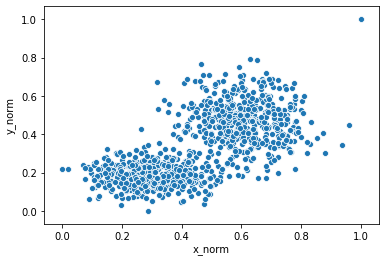

In [225]:
sns.scatterplot(x=data["x_norm"],y=data["y_norm"])

In [255]:
wss=[]
clust=[]

for i in range(1,10):
    within=KMeans(n_clusters=i).fit(data[["x_norm","y_norm"]])
    clust.append(i)
    wss.append(within.inertia_)
    
sns.lineplot(x=clust,y=wss)

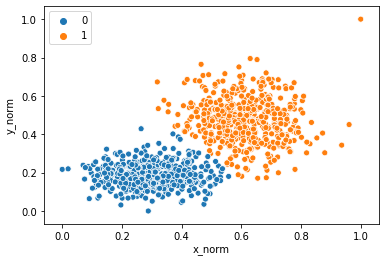

In [256]:
from sklearn.cluster import KMeans
modelokx = KMeans(n_clusters=2).fit(data[["x_norm","y_norm"]])
modeloky = KMeans(n_clusters=3).fit(data[["x_norm","y_norm"]])
modelokz = KMeans(n_clusters=4).fit(data[["x_norm","y_norm"]])




clusters = KMeans(n_clusters=2).fit_predict(data[["x_norm","y_norm"]])
sns.scatterplot(data['x_norm'], data['y_norm'], hue=clusters)

In [258]:
modelokx.cluster_centers_
modeloky.cluster_centers_
modelokz.cluster_centers_

array([[0.60761332, 0.46999319],
       [0.29707882, 0.18917187]])

In [264]:
modelokx.labels_
modeloky.labels_
modelokz.labels_

pd.Series(modelokx.labels_).value_counts()
pd.Series(modeloky.labels_).value_counts()
pd.Series(modelokz.labels_).value_counts()

1    276
0    242
3    241
2    241
dtype: int64

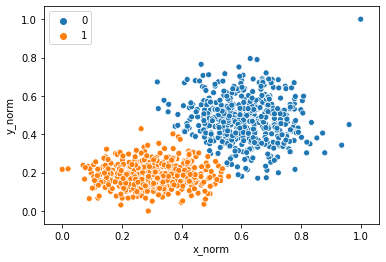

In [265]:
sns.scatterplot(data['x_norm'], data['y_norm'], hue=modelokx.labels_)

In [266]:
sns.scatterplot(data['x_norm'], data['y_norm'], hue=modeloky.labels_)

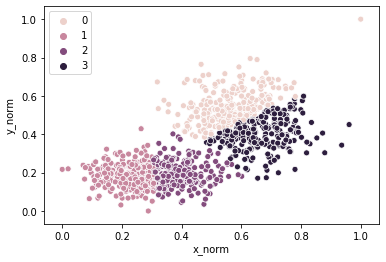

In [267]:
sns.scatterplot(data['x_norm'], data['y_norm'], hue=modelokz.labels_)

# Muestreo vs Poblacion

In [131]:
lista_random=[rn.gauss(1000,200) for f in range(500)]


lista_mu_total=[]
ix=[]

for j in range(100):
    lista_mu=[]
    
    for i in range(10):
        lista_mu.append(rn.choice(lista_random))
    
    ix.append(j)
    lista_mu_total.append(np.mean(lista_mu))

Mu Poblacion: 1008.5754262205693      Mu Muestreo: 1004.7725077108352


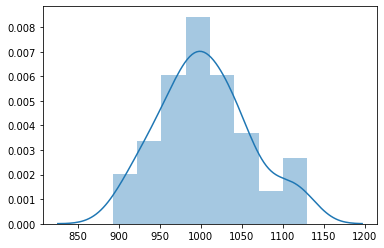

In [136]:
mu_poblacion=np.mean(lista_random)
mu_muestreo=np.mean(lista_mu_total)

print("Mu Poblacion:",mu_poblacion,"     Mu Muestreo:",mu_muestreo)

sns.distplot(lista_mu_total)

# Ejercicios en Listas

In [138]:
#Genere una lista con 500 datos random que sigan una distribución normal. Utilice la libreria random para hacerlo
# utilice media de 0 y desviacion de 50. La función se llama gauss.
#Utilice seabon para hacer un histograma de los datos con la funcion distplot
#!pip install random2
#!pip install seaborn
import random as rn
import seaborn as sns


lista_gaus=[rn.gauss(0,50) for f in range(500)]


## Calcule el valor z para cada dato generado aleartoreamente con la funcion z=xi-xprom/desv
# es de poblacion

valor_z=[]
for x,i in enumerate(lista_gaus):
    valor_z.append((i-np.mean(lista_gaus))/np.std(lista_gaus))
    print(lista_gaus[x],valor_z[x])

gaus

26.35636836482451 0.5081963503204895
45.50322881989861 0.8710908666054646
81.59967050453602 1.5552343989350117
119.97991339164993 2.282663300926514
-54.93194489411105 -1.0324783304679959
10.017021346987898 0.1985132330092747
-0.647816893895876 -0.0036197132125890758
53.800808615487774 1.0283566603015968
-41.74601937635244 -0.78256268117581
-73.50413946314865 -1.3844810820572386
140.47293511594114 2.6710718979026997
20.41243223923099 0.39553966541973234
26.75406806814054 0.5157340373371252
76.75836985962738 1.4634761986887321
-11.014561857526365 -0.20010283418448788
29.61415350983983 0.5699418446867687
-14.531360968425858 -0.26675747530519917
-60.80823108073019 -1.1438528316949115
-59.99982028832348 -1.128530850101201
22.118214781738253 0.42786972454890315
85.33486612439506 1.6260283555149422
5.512596708244922 0.11313991531814568
-58.74455262944761 -1.104739495328194
62.20693487858547 1.1876797582703211
-12.59527823054985 -0.23006248761790912
48.298275547744666 0.9240659813860603
-39.23

Datos         z
0   -23.025361 -0.458266
1    -9.785830 -0.181926
2    25.302012  0.550437
3   -66.065706 -1.356616
4   -34.774210 -0.703491
..         ...       ...
495 -11.715834 -0.222210
496 -59.071498 -1.210631
497   6.943397  0.167251
498   4.794735  0.122403
499 -31.290043 -0.630768

[500 rows x 2 columns]

In [140]:
# Cree una lista con los siguientes 10 valores numericos 3,10,19,10,25,43,12,15,78,54 nombrela lista

lista=[3,10,19,10,25,43,12,15,78,54]

# Calcule la media
# con la media de numpy. Luego calcule la desviación estandar con numpy

#print(
#    np.mean(lista),
#    np.std(lista)
#     )


# Ahora calcule la mediana con la libreria statistics. Tambien calcule la moda

#!pip install statistics
import statistics as st

print(
    st.median(lista),
    st.mode(lista)
)

# Ordene la lista con el metodo sort() y calcule los percentiles de los datos

lista.sort()

ix_lista=range(1,len(lista)+1)

percentil_lista=[f/np.max(ix_lista) for f in ix_lista]

for i in range(len(ix_lista)):
    print(lista[i],ix_lista[i],percentil_lista[i])

17.0 10
3 1 0.1
10 2 0.2
10 3 0.3
12 4 0.4
15 5 0.5
19 6 0.6
25 7 0.7
43 8 0.8
54 9 0.9
78 10 1.0
